## Import Necessary Libraries

In [1]:
import os
import urllib
import requests
import pandas as pd
from tqdm import tqdm
from PIL import Image
import multiprocessing
from io import BytesIO
from pathlib import Path
from functools import partial
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
DATASET_FOLDER = "./data"
train = pd.read_csv(os.path.join(DATASET_FOLDER, "train.csv"))
test = pd.read_csv(os.path.join(DATASET_FOLDER, "test.csv"))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, "sample_test.csv"))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, "sample_test_out.csv"))

In [3]:
train.sample(5)

,sample_id,catalog_content,image_link,price
37951,46480,Item Name: Jolly Ranchers Original Hard Candy ...,https://m.media-amazon.com/images/I/81do0fzjQk...,3.29
11130,103269,Item Name: Ocean Spray® Pure Unsweetened Cranb...,https://m.media-amazon.com/images/I/71PpMhJmtC...,36.58
61528,298507,Item Name: Antimo Caputo Chef's Flour 2.2 LB -...,https://m.media-amazon.com/images/I/71FMG9xRCS...,13.33
41945,28809,"Item Name: Liebers Crackers Honey Grahams, 14....",https://m.media-amazon.com/images/I/7135ia1tJj...,9.31
37241,186236,Item Name: Hanes Men's Nano-T-shirt_Orange_3XL...,https://m.media-amazon.com/images/I/61crTWz8je...,6.56


In [4]:
test.sample(5)

,sample_id,catalog_content,image_link
12131,226660,Item Name: GURU Yerba Mate Organic Energy Drin...,https://m.media-amazon.com/images/I/81UMNQlOG-...
16131,133954,"Item Name: NCS Red, White, and Blue Edible Jim...",https://m.media-amazon.com/images/I/81cNQn60WI...
66568,157075,"Item Name: Turano Baking Pane Turano, 32 Ounce...",https://m.media-amazon.com/images/I/41motGOPhm...
18785,162684,Item Name: Organic Smooth Peanut Butter 35 Oun...,https://m.media-amazon.com/images/I/71zQpJ9sUA...
35724,130490,Item Name: Kinnikinnick Foods Graham Style Cra...,https://m.media-amazon.com/images/I/71pu67azvL...


In [5]:
sample_test.sample(5)

,sample_id,catalog_content,image_link
62,104621,"Item Name: Gold Edible Poppy Paint, Fast Dryin...",https://m.media-amazon.com/images/I/414ES6H46s...
78,85054,Item Name: Kellogg's Frosted Flakes Frosted Fl...,https://m.media-amazon.com/images/I/916LCEK9g+...
22,60187,Item Name: Black Salt | Authentic Kala Namak f...,https://m.media-amazon.com/images/I/714HtQaDxo...
53,240492,Item Name: Three Pepper Barbecue Sauce\nBullet...,https://m.media-amazon.com/images/I/51ThSztnVF...
93,269532,"Item Name: Mio Energy Liquid Water Enhancer, T...",https://m.media-amazon.com/images/I/71mSCmsJd7...


In [6]:
sample_test_out.sample(5)

,sample_id,price
8,13187,20.095844
46,154665,97.868203
17,72584,32.958478
9,55004,22.332988
36,113002,28.166688


## Display Images

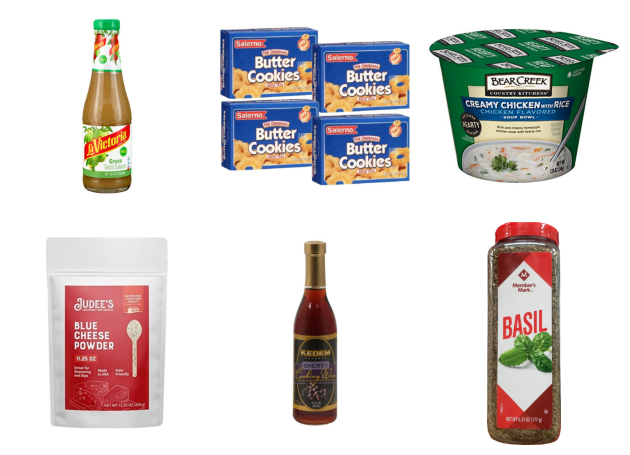

In [7]:
image_urls = train["image_link"].head(6).tolist()

for i, url in enumerate(image_urls):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
    except Exception as e:
        print(f"Error loading image {i+1}: {e}")

plt.tight_layout()
plt.show()

## Download Images

In [8]:
def download_image(image_link, savefolder):
    if isinstance(image_link, str):
        filename = Path(image_link).name
        image_save_path = os.path.join(savefolder, filename)
        if not os.path.exists(image_save_path):
            try:
                urllib.request.urlretrieve(image_link, image_save_path)
            except Exception as ex:
                print("Warning: Not able to download - {}\n{}".format(image_link, ex))
        else:
            return
    return


def download_images(image_links, download_folder):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)
    results = []
    download_image_partial = partial(download_image, savefolder=download_folder)
    with multiprocessing.Pool(100) as pool:
        for result in tqdm(
            pool.imap(download_image_partial, image_links), total=len(image_links)
        ):
            results.append(result)
        pool.close()
        pool.join()

In [ ]:
print("Downloading images...")
download_images(sample_test["image_link"], "./images")
print("Download complete!!!")

In [ ]:
assert len(os.listdir("./images")) > 0

In [ ]:
!rm -rf ./images